In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import tables
from modules.startup import MyFuncs as mf

** Access the database **

In [2]:
db = mf.read_access_h5()
print(db.root)

Enter the name and location of your database: calibration
Database loaded.


** Have a look a its contents **

In [5]:
db.root

/ (RootGroup) 'Calibration of SU8-PMMA chip with two readouts '
  children := ['particles' (Group)]

** Set up a Figure and plot object **

<IPython.core.display.Javascript object>


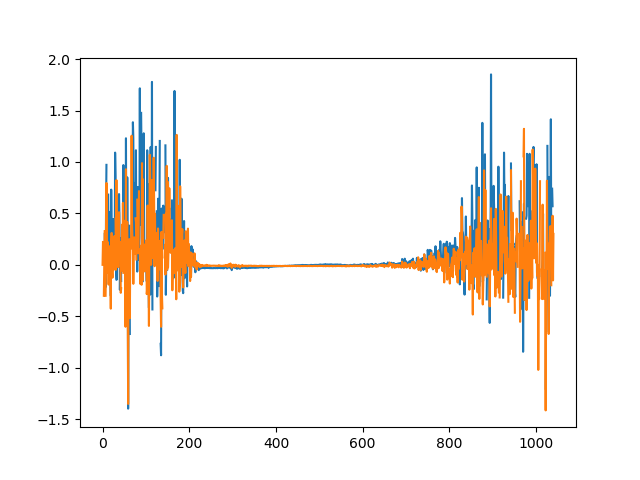

In [24]:
canvas = plt.figure('Absorbance')
fig = canvas.add_subplot(111, label='Absorbance')

** Plot Absorbance for all data in dataset with water as reference **

In [25]:
data = db.root.particles.right
reference = data.water

for readout in data:
    if readout == reference:
        pass
    else:
        a = mf.Absorbance(readout.read(), data.water.read())
        fig.plot(a, label = readout.title)
plt.legend()

/home/nils/Research/Topics/Python/MyOpticsLab - Jupyter/Measurement/modules/startup.py:41: RuntimeWarning: divide by zero encountered in true_divide
  L = -np.log10(i/i0)
/home/nils/Research/Topics/Python/MyOpticsLab - Jupyter/Measurement/modules/startup.py:41: RuntimeWarning: divide by zero encountered in log10
  L = -np.log10(i/i0)
/home/nils/Research/Topics/Python/MyOpticsLab - Jupyter/Measurement/modules/startup.py:41: RuntimeWarning: invalid value encountered in log10
  L = -np.log10(i/i0)


** Close database access **

In [31]:
db.close()

** OR: Set up a another Figure and plot object **

<IPython.core.display.Javascript object>


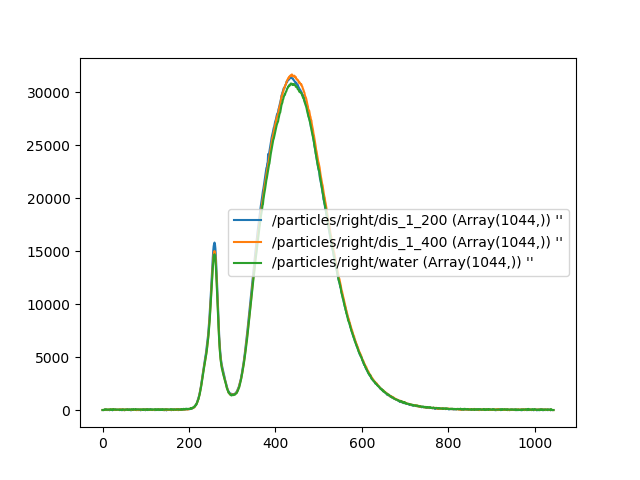

In [15]:
canvas2 = plt.figure('Intensity')
fig2 = canvas2.add_subplot(111, label='intensities')

** Plot Intensity values for all data in dataset with water as reference **

In [19]:
data = db.root.particles.right

for readout in data:
    fig2.plot(readout.read(), label = readout)
fig2.legend()

** Close database access **

In [31]:
db.close()

### * Linking to other files * ###

In [27]:
db.create_external_link('/','link4', 'calibration_particles.h5:/')

/link4 (ExternalLink) -> calibration_particles.h5:/

In [30]:
db.root.link4()

/ (RootGroup) ''
  children := ['blue_dye' (Group), 'particles' (Group), 'water' (Group), 'wavelength' (Group)]